In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import os

In [3]:
!git clone https://github.com/eliasezar27/PRESANA.git

Cloning into 'PRESANA'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 131 (delta 32), reused 55 (delta 28), pack-reused 72
Receiving objects: 100% (131/131), 1.23 GiB | 33.90 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Checking out files: 100% (52/52), done.


In [4]:
base_dir = '/content/PRESANA/hawaii_airBnbGroup'

In [8]:
hawaiiStatedoc = os.path.join(base_dir, 'hawaii_state_covid_cases.html')
hawaiiCountydoc = os.path.join(base_dir, 'hawaii_county_covid_cases.html')
honoluluCountydoc = os.path.join(base_dir, 'honolulu_county_covid_cases.html')
mauiCountydoc = os.path.join(base_dir, 'maui_county_covid_cases.html')
kauaiCountydoc = os.path.join(base_dir, 'kauai_county_covid_cases.html')

In [10]:
def getCases(htmldoc):
    with open(htmldoc) as fp:
        soup = BeautifulSoup(fp, "html.parser")   
    item = soup.find('g')

    dates = []
    cases = []
    for i in item.find_all('g'):
        dates.append(i["aria-label"][18:30])
        cases.append(i["aria-label"][30:])

    return dates, cases

In [11]:
dates, hawaiiState = getCases(hawaiiStatedoc)
_, hawaiiCounty = getCases(hawaiiCountydoc)
_, honoluluCounty = getCases(honoluluCountydoc)
_, mauiCounty = getCases(mauiCountydoc)
_, kauaiCounty = getCases(kauaiCountydoc)

In [12]:
covid_cases_hawaii = pd.DataFrame([])

In [13]:
covid_cases_hawaii['date'] = dates
covid_cases_hawaii['date'] = pd.to_datetime(covid_cases_hawaii['date'])
covid_cases_hawaii['hawaii'] = hawaiiCounty
covid_cases_hawaii['honolulu'] = honoluluCounty
covid_cases_hawaii['maui'] = mauiCounty
covid_cases_hawaii['kauai'] = kauaiCounty
covid_cases_hawaii['total'] = hawaiiState

In [25]:
covid_cases_hawaii['hawaii'] = covid_cases_hawaii['hawaii'].map(lambda x: str(x).replace(',','')).astype(int)
covid_cases_hawaii['honolulu'] = covid_cases_hawaii['honolulu'].map(lambda x: str(x).replace(',','')).astype(int)
covid_cases_hawaii['maui'] = covid_cases_hawaii['maui'].map(lambda x: str(x).replace(',','')).astype(int)
covid_cases_hawaii['kauai'] = covid_cases_hawaii['kauai'].map(lambda x: str(x).replace(',','')).astype(int)
covid_cases_hawaii['total'] = covid_cases_hawaii['total'].map(lambda x: str(x).replace(',','')).astype(int)
covid_cases_hawaii = covid_cases_hawaii[covid_cases_hawaii['date'] < '2021-12-04']

In [26]:
covid_cases_hawaii

,date,hawaii,honolulu,maui,kauai,total
0,2020-03-03,0,0,1,0,1
1,2020-03-04,0,0,0,0,0
2,2020-03-05,0,0,0,0,0
3,2020-03-06,0,1,0,0,1
4,2020-03-07,0,0,0,0,0
...,...,...,...,...,...,...
636,2021-11-29,2,26,14,25,67
637,2021-11-30,3,46,19,9,77
638,2021-12-01,17,51,18,26,112
639,2021-12-02,10,58,14,18,100


In [27]:
covid_cases_hawaii.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      641 non-null    datetime64[ns]
 1   hawaii    641 non-null    int64         
 2   honolulu  641 non-null    int64         
 3   maui      641 non-null    int64         
 4   kauai     641 non-null    int64         
 5   total     641 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 35.1 KB


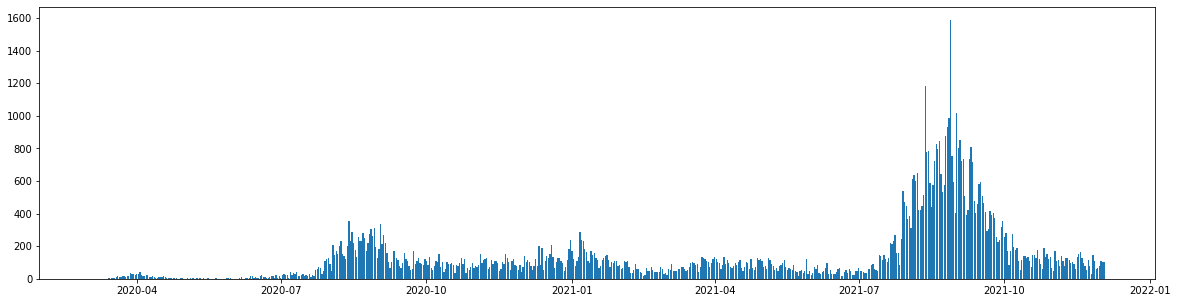

In [28]:
plt.figure(figsize=(20,5))
plt.bar(covid_cases_hawaii['date'], covid_cases_hawaii['total'])
plt.show()

In [29]:
csv_file=os.path.join(base_dir, "hawaii_covid_cases.csv")
covid_cases_hawaii.to_csv(csv_file, index=False)
files.download(csv_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>